# Project Title
### Data Engineering Capstone Project

### Project Summary

This project is primarily scoped to illustrate the fitness of modern “Data Engineering Technologies”, such as Spark, Apache Airflow, Redshift, S3 and Cloud infrastructure, in solutioning of large-scale data transformation (Big data ETL, Data lake) which can scale and adapt to growing needs of business and data scientist.

Although evaluation and fitment of technology is primary driver, data quality and data size are important factor for success of this project. We will use data set provided by Udacity. Udacity data set is free for its students, good quality and high volume.





In [44]:
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import missingno as msno
import re as regex

### Step 1: Scope the Project and Gather Data

#### Business use case

Project will focus to answer below insights/query and will guide design of LDM (Logical data model) of OLAP (Fact – Dimension model). 

    •	Insight on visitor type (Student, Tourism, Skilled worker, Business)
    •	Country of visitor
    •	Destination of visitor (US cities)
    •	Climate/temperature of US cities 
    
#### Datasets
We will use data set provided by Udacity. Udacity data set is free for its students, good quality and high volume.

    •	I94 Immigration Data: This data comes from the US National Tourism and Trade Office. This is where the data comes from. 
    •	World Temperature Data: This dataset came from Kaggle. You can read more about it here.
    •	U.S. City Demographic Data: This data comes from OpenSoft. You can read more about it here.
    •	Airport Code Table: This is a simple table of airport codes and corresponding cities. It comes from here.




### Common Function


In [45]:
def print_info(df):
    print ("\n\n")
    print ("START - Dataset Information ------------------")
    print ("\nColumn-names:\n", list(df.columns.values), "\n")
    print ("\nShape(rows,col):\n", df.shape, "\n")
    print ("\nDataType(colName,dataType):\n", df.dtypes, "\n")
    print ("END - Dataset Information ---------------------")


    
def print_detailed_report(df):
    
    missing_values = []
    nonumeric_values = []

    print ("\n\n")
    print ("START Dataset Information ------------------")

    for column in df:
        # Find all the unique feature values
        uniq = df[column].unique()
        print ("'{}' has= {} unique values" .format(column,uniq.size))
        if (uniq.size > 10):
            print("~~Listing up to 10 unique values~~")
        print (uniq[0:10])
        print ("\n-----------------------------------------------------------------------\n")

        # Find features with missing values
        if (True in pd.isnull(uniq)):
            s = "{} has {} missing" .format(column, pd.isnull(df[column]).sum())
            missing_values.append(s)

        # Find features with non-numeric values
        for i in range (1, np.prod(uniq.shape)):
            if (regex.match('nan', str(uniq[i]))):
                break
            if not (regex.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
                nonumeric_values.append(column)
                break

    print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    print ("Features with missing values:\n{}\n\n" .format(missing_values))
    print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
    print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    print ("END Dataset Information ------------------")

### Import Immigration Data

In [46]:
folder = 'sas_data'
df = pq.ParquetDataset(folder).read_pandas().to_pandas(split_blocks=True, self_destruct=True)

#### Data Dictionary
* cicid - float64 - ID that uniquely identify one record in the dataset
* i94yr - float64 - 4 digit year
* i94mon- float64 - Numeric month
* i94cit - float64 - 3 digit code of source city for immigration (Born country)
* i94res - float64 - 3 digit code of source country for immigration (Residence country)
* i94port - object - Port addmitted through
* arrdate - float64 - Arrival date in the USA
* i94mode - float64 - Mode of transportation (1 = Air; 2 = Sea; 3 = Land; 9 = Not reported)
* i94addr - object - State of arrival
* depdate  -float64 - Departure date
* i94bir - float64 - Age of Respondent in Years
* i94visa - float64 - Visa codes collapsed into three categories: (1 = Business; 2 = Pleasure; 3 = Student)
* count - float64 - Used for summary statistics
* dtadfile - object - Character Date Field
* visapost - object - Department of State where where Visa was issued
* occup - object - Occupation that will be performed in U.S.
* entdepa - object - Arrival Flag. Whether admitted or paroled into the US
* entdepd - object - Departure Flag. Whether departed, lost visa, or deceased
* entdepu - object - Update Flag. Update of visa, either apprehended, overstayed, or updated to PR
* matflag - object - Match flag
* biryear - float64 - 4 digit year of birth
* dtaddto - object - Character date field to when admitted in the US
* gender  - object - Gender
* insnum  -  object - INS number
* airline -    object - Airline used to arrive in U.S.
* admnum -     float64 - Admission number, should be unique and not nullable
* fltno   -     object - Flight number of Airline used to arrive in U.S.
* visatype  -  object - Class of admission legally admitting the non-immigrant to temporarily stay in U.S.

### Step 2: Explore and Assess the Data


In [47]:
print_info(df)





START - Dataset Information ------------------

Column-names:
 ['cicid', 'i94yr', 'i94mon', 'i94cit', 'i94res', 'i94port', 'arrdate', 'i94mode', 'i94addr', 'depdate', 'i94bir', 'i94visa', 'count', 'dtadfile', 'visapost', 'occup', 'entdepa', 'entdepd', 'entdepu', 'matflag', 'biryear', 'dtaddto', 'gender', 'insnum', 'airline', 'admnum', 'fltno', 'visatype'] 


Shape(rows,col):
 (3096313, 28) 


DataType(colName,dataType):
 cicid       float64
i94yr       float64
i94mon      float64
i94cit      float64
i94res      float64
i94port      object
arrdate     float64
i94mode     float64
i94addr      object
depdate     float64
i94bir      float64
i94visa     float64
count       float64
dtadfile     object
visapost     object
occup        object
entdepa      object
entdepd      object
entdepu      object
matflag      object
biryear     float64
dtaddto      object
gender       object
insnum       object
airline      object
admnum      float64
fltno        object
visatype     object
dtype: objec

In [48]:
print_detailed_report(df)




START Dataset Information ------------------
'cicid' has= 3096313 unique values
~~Listing up to 10 unique values~~
[ 6.  7. 15. 16. 17. 18. 19. 20. 21. 22.]

-----------------------------------------------------------------------

'i94yr' has= 1 unique values
[2016.]

-----------------------------------------------------------------------

'i94mon' has= 1 unique values
[4.]

-----------------------------------------------------------------------

'i94cit' has= 243 unique values
~~Listing up to 10 unique values~~
[692. 254. 101. 102. 103. 104. 105. 107. 108. 109.]

-----------------------------------------------------------------------

'i94res' has= 229 unique values
~~Listing up to 10 unique values~~
[692. 276. 101. 110. 117. 112. 251. 102. 103. 104.]

-----------------------------------------------------------------------

'i94port' has= 299 unique values
~~Listing up to 10 unique values~~
['XXX' 'ATL' 'WAS' 'NYC' 'TOR' 'BOS' 'HOU' 'MIA' 'CHI' 'LOS']

-----------------------------

### Missing data

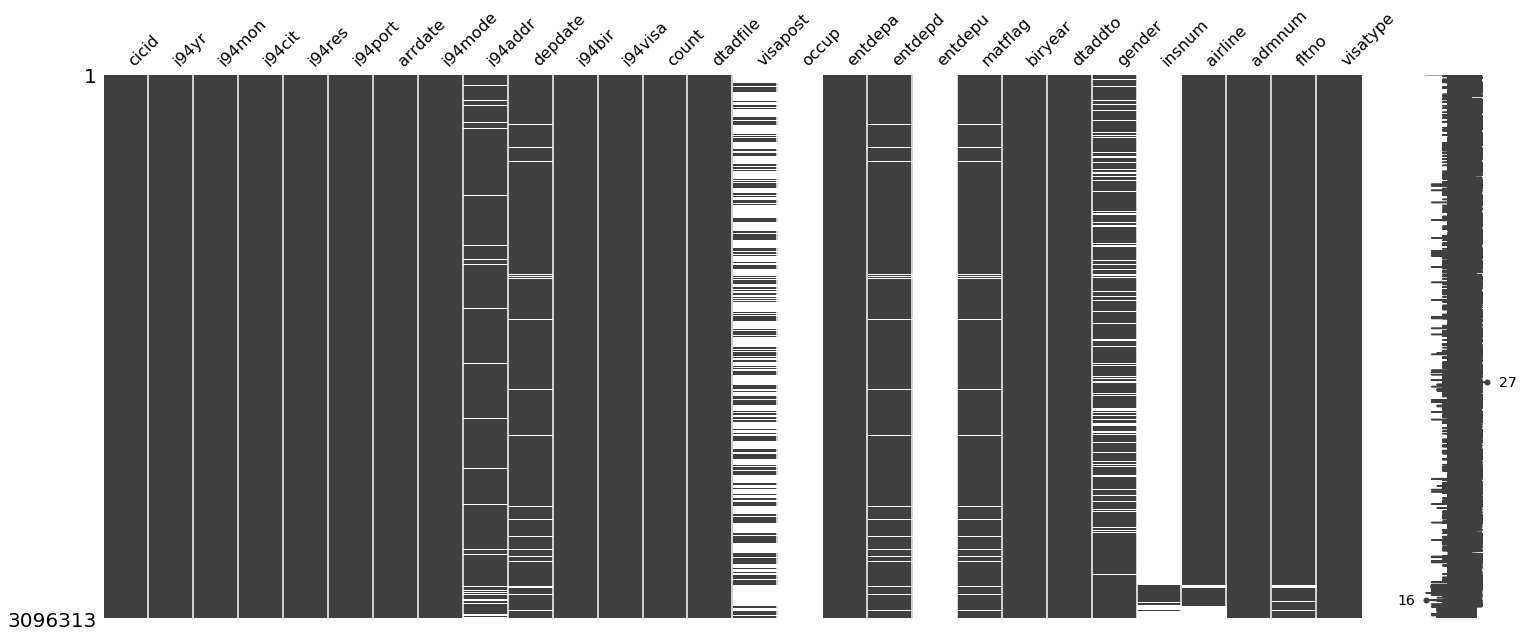

In [49]:
msno.matrix(df)

In [50]:
(df.isnull().sum() / len(df))*100

cicid        0.000000
i94yr        0.000000
i94mon       0.000000
i94cit       0.000000
i94res       0.000000
i94port      0.000000
arrdate      0.000000
i94mode      0.007719
i94addr      4.928184
depdate      4.600859
i94bir       0.025902
i94visa      0.000000
count        0.000000
dtadfile     0.000032
visapost    60.757746
occup       99.737559
entdepa      0.007687
entdepd      4.470769
entdepu     99.987340
matflag      4.470769
biryear      0.025902
dtaddto      0.015405
gender      13.379429
insnum      96.327632
airline      2.700857
admnum       0.000000
fltno        0.631364
visatype     0.000000
dtype: float64

### Know your data

In [51]:
df[['i94mode', 'gender']].apply(pd.Series.value_counts)

i94mode     gender
1.0  2994505.0        NaN
2.0    26349.0        NaN
3.0    66660.0        NaN
9.0     8560.0        NaN
F          NaN  1302743.0
M          NaN  1377224.0
U          NaN      467.0
X          NaN     1610.0

In [52]:
dfg = df.groupby('i94mode').agg(
{'cicid': 'count',
 'i94bir': [min, 'nunique', max], 
 'i94visa': ['count'],  
 'gender': ['count'],
 'visatype': ['nunique', 'unique']
})
dfg.columns = ["_".join(x) for x in dfg.columns.ravel()]

In [53]:
print('Total D/S Visa = {}'.format(df[df.dtaddto == 'D/S'].shape[0]))
temp = ['F1', 'F2', 'F3']
print('Total Students Visa by visatype = {}'.format(df[df.visatype.isin(temp)].shape[0]))

Total D/S Visa = 45343
Total Students Visa by visatype = 42000


In [54]:
temp = ['WT']
print('Total WT Visa by visatype = {}'.format(df[df.visatype.isin(temp)].shape[0]))

Total WT Visa by visatype = 1309059


In [55]:
df1 = df[['cicid','gender', 'i94addr', 'visapost']]
size = df1.groupby('cicid')['gender','i94addr'].size().reset_index()
size[size[0] > 1]        # DATAFRAME OF DUPLICATES

len(size[size[0] > 1])   # NUMBER OF DUPLICATES
print('Duplicates = {}'.format(len(size[size[0] > 1])))

D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Duplicates = 0


### Airport Code Table

### Data Dictionary

* ident -Unique identifier
* type - Type of the airport
* name - Airport Name
* elevation_ft - Altitude of the airport
* continent - Continent
* iso_country -ISO code of the country of the airport
* iso_region - ISO code for the region of the airport
* municipality - City where the airport is located
* gps_code - GPS code of the airport
* iata_code - IATA code of the airport
* local_code - Local code of the airport
* coordinates - GPS coordinates of the airport

In [56]:
airport = pd.read_csv("airport-codes_csv.csv")

In [57]:
print_info(airport)




START - Dataset Information ------------------

Column-names:
 ['ident', 'type', 'name', 'elevation_ft', 'continent', 'iso_country', 'iso_region', 'municipality', 'gps_code', 'iata_code', 'local_code', 'coordinates'] 


Shape(rows,col):
 (55075, 12) 


DataType(colName,dataType):
 ident            object
type             object
name             object
elevation_ft    float64
continent        object
iso_country      object
iso_region       object
municipality     object
gps_code         object
iata_code        object
local_code       object
coordinates      object
dtype: object 

END - Dataset Information ---------------------


In [58]:
print_detailed_report(airport)




START Dataset Information ------------------
'ident' has= 55075 unique values
~~Listing up to 10 unique values~~
['00A' '00AA' '00AK' '00AL' '00AR' '00AS' '00AZ' '00CA' '00CL' '00CN']

-----------------------------------------------------------------------

'type' has= 7 unique values
['heliport' 'small_airport' 'closed' 'seaplane_base' 'balloonport'
 'medium_airport' 'large_airport']

-----------------------------------------------------------------------

'name' has= 52144 unique values
~~Listing up to 10 unique values~~
['Total Rf Heliport' 'Aero B Ranch Airport' 'Lowell Field' 'Epps Airpark'
 'Newport Hospital & Clinic Heliport' 'Fulton Airport' 'Cordes Airport'
 'Goldstone /Gts/ Airport' 'Williams Ag Airport'
 'Kitchen Creek Helibase Heliport']

-----------------------------------------------------------------------

'elevation_ft' has= 5450 unique values
~~Listing up to 10 unique values~~
[  11. 3435.  450.  820.  237. 1100. 3810. 3038.   87. 3350.]

--------------------------

### World Temperature Data: 

In [60]:
temperature_file_name = '../../data2/GlobalLandTemperaturesByCity.csv'
temperature = pd.read_csv(temperature_file_name)

In [62]:
temperature.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [63]:
print_info(temperature)




START - Dataset Information ------------------

Column-names:
 ['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country', 'Latitude', 'Longitude'] 


Shape(rows,col):
 (8599212, 7) 


DataType(colName,dataType):
 dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object 

END - Dataset Information ---------------------


In [64]:
print_detailed_report(temperature)




START Dataset Information ------------------
'dt' has= 3239 unique values
~~Listing up to 10 unique values~~
['1743-11-01' '1743-12-01' '1744-01-01' '1744-02-01' '1744-03-01'
 '1744-04-01' '1744-05-01' '1744-06-01' '1744-07-01' '1744-08-01']

-----------------------------------------------------------------------

'AverageTemperature' has= 111995 unique values
~~Listing up to 10 unique values~~
[ 6.068    nan  5.788 10.644 14.051 16.082 12.781  7.95   4.639  0.122]

-----------------------------------------------------------------------

'AverageTemperatureUncertainty' has= 10903 unique values
~~Listing up to 10 unique values~~
[1.737   nan 3.624 1.283 1.347 1.396 1.454 1.63  1.302 1.756]

-----------------------------------------------------------------------

'City' has= 3448 unique values
~~Listing up to 10 unique values~~
['Århus' 'Çorlu' 'Çorum' 'Öskemen' 'Ürümqi' 'A Coruña' 'Aachen' 'Aalborg'
 'Aba' 'Abadan']

-------------------------------------------------------------------

### U.S. City Demographic Data

In [68]:
dem = pd.read_csv("us-cities-demographics.csv", sep=";")

In [69]:
dem.head()

City          State  Median Age  Male Population  \
0     Silver Spring       Maryland        33.8          40601.0   
1            Quincy  Massachusetts        41.0          44129.0   
2            Hoover        Alabama        38.5          38040.0   
3  Rancho Cucamonga     California        34.5          88127.0   
4            Newark     New Jersey        34.6         138040.0   

   Female Population  Total Population  Number of Veterans  Foreign-born  \
0            41862.0             82463              1562.0       30908.0   
1            49500.0             93629              4147.0       32935.0   
2            46799.0             84839              4819.0        8229.0   
3            87105.0            175232              5821.0       33878.0   
4           143873.0            281913              5829.0       86253.0   

   Average Household Size State Code                       Race  Count  
0                    2.60         MD         Hispanic or Latino  25924  
1                    2.39         MA                      White  58723  
2                    2.58         AL                      Asian   4759  
3                    3.18         CA  Black or African-American  24437  
4                    2.73         NJ                      White  76402

In [70]:
print_info(dem)




START - Dataset Information ------------------

Column-names:
 ['City', 'State', 'Median Age', 'Male Population', 'Female Population', 'Total Population', 'Number of Veterans', 'Foreign-born', 'Average Household Size', 'State Code', 'Race', 'Count'] 


Shape(rows,col):
 (2891, 12) 


DataType(colName,dataType):
 City                       object
State                      object
Median Age                float64
Male Population           float64
Female Population         float64
Total Population            int64
Number of Veterans        float64
Foreign-born              float64
Average Household Size    float64
State Code                 object
Race                       object
Count                       int64
dtype: object 

END - Dataset Information ---------------------


In [71]:
print_detailed_report(dem)




START Dataset Information ------------------
'City' has= 567 unique values
~~Listing up to 10 unique values~~
['Silver Spring' 'Quincy' 'Hoover' 'Rancho Cucamonga' 'Newark' 'Peoria'
 'Avondale' 'West Covina' "O'Fallon" 'High Point']

-----------------------------------------------------------------------

'State' has= 49 unique values
~~Listing up to 10 unique values~~
['Maryland' 'Massachusetts' 'Alabama' 'California' 'New Jersey' 'Illinois'
 'Arizona' 'Missouri' 'North Carolina' 'Pennsylvania']

-----------------------------------------------------------------------

'Median Age' has= 180 unique values
~~Listing up to 10 unique values~~
[33.8 41.  38.5 34.5 34.6 33.1 29.1 39.8 36.  35.5]

-----------------------------------------------------------------------

'Male Population' has= 594 unique values
~~Listing up to 10 unique values~~
[ 40601.  44129.  38040.  88127. 138040.  56229.  38712.  51629.  41762.
  51751.]

----------------------------------------------------------------

In [72]:
dfg = dem.groupby(['State']).agg(
{'Median Age': 'median',
 'Male Population': 'sum', 
 'Female Population' : sum,
 'Total Population' : sum,
 'Number of Veterans' : sum,
 'Foreign-born': sum,
 'Average Household Size': 'mean',
 'Count': sum,
 'Race': lambda x: list(x), 
 'City': lambda x: list(x)
 
})

dfg.reset_index()

State  Median Age  Male Population  Female Population  \
0                Alabama       38.00        2448200.0          2715106.0   
1                 Alaska       32.20         764725.0           728750.0   
2                Arizona       34.10       11137275.0         11360435.0   
3               Arkansas       32.60        1400724.0          1482165.0   
4             California       35.80       61055672.0         62388681.0   
5               Colorado       36.80        7273095.0          7405250.0   
6            Connecticut       35.40        2123435.0          2231661.0   
7               Delaware       36.40         163400.0           196385.0   
8   District of Columbia       33.80        1598525.0          1762615.0   
9                Florida       40.20       15461937.0         16626425.0   
10               Georgia       33.70        4101605.0          4453555.0   
11                Hawaii       41.40         884035.0           879795.0   
12                 Idaho       34.90         995515.0           998900.0   
13              Illinois       35.70       10943864.0         11570526.0   
14               Indiana       34.50        4399882.0          4697912.0   
15                  Iowa       34.50        1772066.0          1831937.0   
16                Kansas       34.60        2820725.0          2920645.0   
17              Kentucky       35.95        2262415.0          2386970.0   
18             Louisiana       33.95        3134990.0          3367985.0   
19                 Maine       40.30         157400.0           176960.0   
20              Maryland       35.90        3139755.0          3420890.0   
21         Massachusetts       34.90        4841101.0          5155944.0   
22              Michigan       35.30        5217245.0          5667993.0   
23             Minnesota       35.10        3478803.0          3565362.0   
24           Mississippi       31.70         527627.0           613916.0   
25              Missouri       35.70        3666310.0          3929660.0   
26               Montana       35.50         438535.0           467935.0   
27              Nebraska       33.25        1786665.0          1819500.0   
28                Nevada       36.10        5593225.0          5610495.0   
29         New Hampshire       37.80         488855.0           502135.0   
30            New Jersey       34.60        3423033.0          3507991.0   
31            New Mexico       37.15        2045050.0          2150160.0   
32              New York       36.00       23422799.0         25579256.0   
33        North Carolina       35.10        7330525.0          7970470.0   
34          North Dakota       34.35         476175.0           471275.0   
35                  Ohio       36.00        5853254.0          6243296.0   
36              Oklahoma       33.30        3572865.0          3672110.0   
37                Oregon       36.15        3537215.0          3645330.0   
38          Pennsylvania       34.10        5514704.0          5988097.0   
39           Puerto Rico       41.40         930052.0          1100795.0   
40          Rhode Island       39.20         974791.0          1011321.0   
41        South Carolina       34.50        1265291.0          1321685.0   
42          South Dakota       37.05         613590.0           611900.0   
43             Tennessee       34.10        5124189.0          5565976.0   
44                 Texas       32.90       34862194.0         35691659.0   
45                  Utah       30.80        2586752.0          2532925.0   
46              Virginia       34.90        5802370.0          6015740.0   
47            Washington       36.30        6228025.0          6272510.0   
48             Wisconsin       33.00        3444015.0          3621710.0   

    Total Population  Number of Veterans  Foreign-born  \
0            5163306            352896.0      252541.0   
1            1493475            137460.0      166290.0   
2           22497710           1322525.0    

### Step 3: Define the Data Model

### Solution Building blocks 

#### AWS
    This project will use EC2, S3, EMR cluster (Spark), Apache Airflow - will be core components of solution design.
    a)	S3 – Storage 
    b)	EMR – Spark cluster for Data Transformation.
    c)	Apache Airflow – Data pipeline and orchestration.

#### LDM  (Logical data model)
       This project will use “Fact & Dimension” LDM model (Star schema) for OLAP cubes.
        
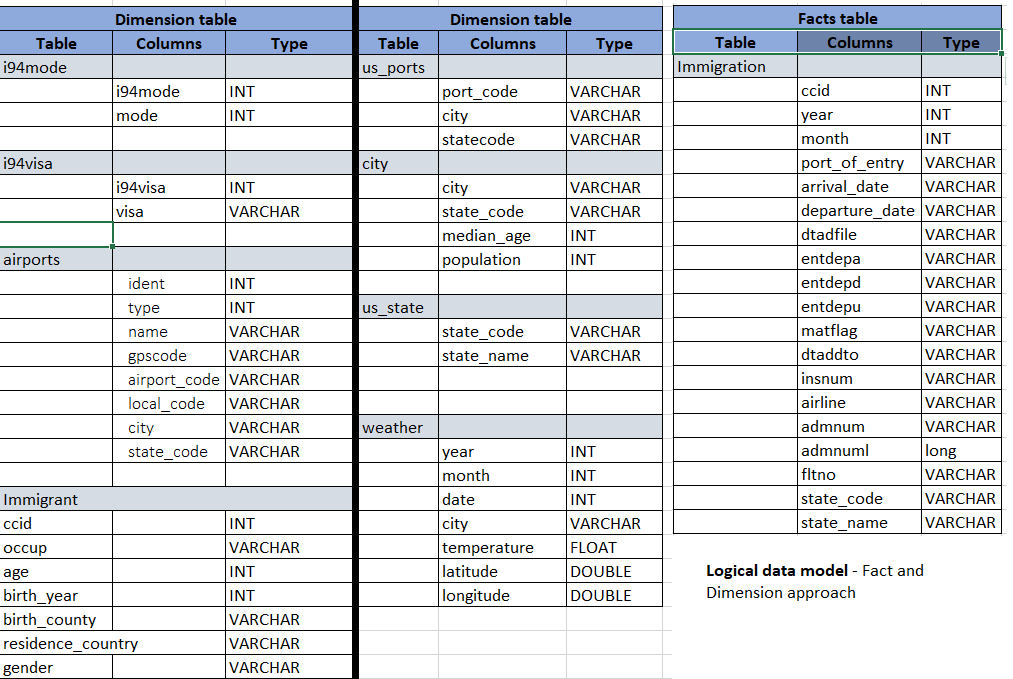
        
        
        
        
#### Dictionary Data
    Dictionary data is provided by Udacity 
    a)	i94cntyl.txt: Country and the corresponding codes. 
    b)	i94addrl.txt:  USA state name and code. We need to cleanup unwanted "'".
    c)	i94model.txt:  i94Mode. 
    d)	i94prtl.txt:  USA port codes map to city, state. 
    e)	i94visa.txt: Visa types.

#### Programming language
    a)This project will use Python, PySpark, SQL for programing.
    b)Other utility and tools
        Jupyter notebook – for initial data assessment and analysis 


### Step 4: Run Pipelines to Model the Data 

#### Airflow DAGs will be used to Orchestrate end to end pipeline
At high level we will use below Operators to build end to end flow.

    a) Airflow Operator to Create EMR cluster
    b) Airflow Operator EMR cluster status/sensor check
    c) Airflow Operator EMR cluster terminate
    d) Airflow Operator Load and Transfrom data ( Using Spark and S3)
    e) Airflow Operator Data Quality check
  
 
 
 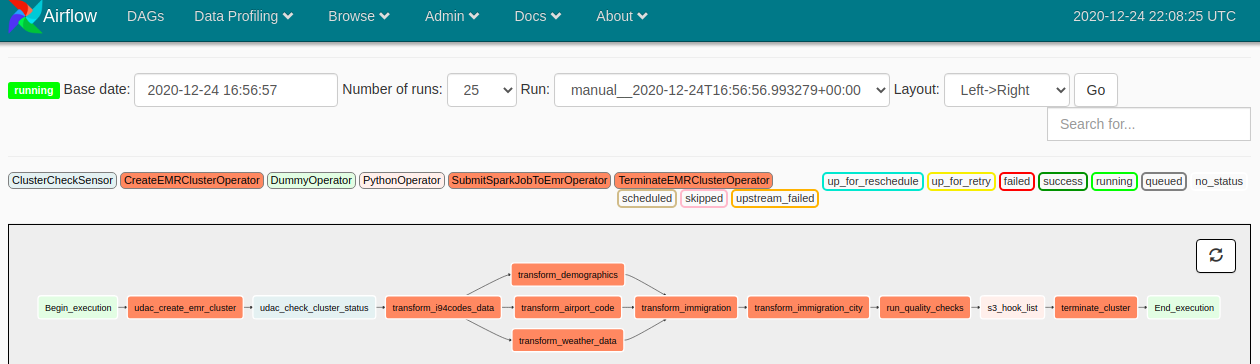

#### 4.2 Data Quality Checks
         
    a)Data Dictionary will used to check relevence of data.
    b)Duplicate data will be removed
    c)Missing data will be ignored
    d)Intrgrity constraint will be maintained by Primary keys

#### 4.3 Data dictionary 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.

Dictionary data is provided by Udacity 

    a)    i94cntyl.txt: Country and the corresponding codes. 
    b)    i94addrl.txt:  USA state name and code. We need to cleanup unwanted "'".
    c)    i94model.txt:  i94Mode. 
    d)    i94prtl.txt:  USA port codes map to city, state. 
    e)    i94visa.txt: Visa types.

#### Step 5: Complete Project Write Up


##### 1) Clearly state the rationale for the choice of tools and technologies for the project.

    This project will use EC2, S3, EMR cluster (Spark), Apache Airflow - will be core components of solution design.
    a)    S3 – S3 Storage is elastic and scales up/shrinks down effectivly as per demand. S3 sotrage is distributed and b=ehnce good choice for Spark work load processing. Hence it is a very good choice of Big Data workloads.
    
    b)    EMR – Spark EMR cluster can scale up/shrink-down as per workload demand. Spark is best at parallel/distributed computing. Hence it is a very good choice of Big Data workloads.
    
    c)    Apache Airflow – Data pipeline and orchestration. Airflow can manages end to end orchestration of workflow as well as monitor status of each task/job. Airflow has many useful Hooks and Operator already built in for connecting and managing Cloud services. Hence it is a very good choice of Big Data workloads.
 

##### 2) Propose how often the data should be updated and why.

As per current usecase requirement, data can be update once a day. However, if usecase needs change, data load frequency can be configured to hourly.

##### 3) Write a description of how you would approach the problem differently under the following scenarios:


##### 3.1) The data was increased by 100x.

    a) In case data volume increase by 100%, we need to scale Up EMR Spark cluster and S3 capacity. Since Spark is distributed in nature and can increase parallel/distributed computing based on number of worker nodes, increasing EMR capacity (worker nodes) should help to accomodate 100x increase.
    
    c) Also, S3 storage can easily scale up to compliment Spark processing and provide distributed storage for 100x data increase.

    d)Airflow only orchestrates flow/pipeline and does not process data, Airflow capacity increase is not required.


##### 3.2) The data populates a dashboard that must be updated on a daily basis by 7am every day.
    For Such requirement, we can extend our Data lake by Adding RedShift OLAP tables. Spark can populate RedShift OLAP cubes with transformed data in advance. This will help to manage SLA for "Data being ready by 7 AM every day" for consumption. 


##### 3.3) The database needed to be accessed by 100+ people.
    For concurrent data consumption by Applications/Consumer, it will be good idea to Add RedShift OLAP tables (Staging and OLAP). This will ensure data-consumtion by Applications/Consumer is rendered by RedShift. RedShift is distributed and MPP database, which can scale up to petabyte data and is good solution-block in Big Data landscape.